# **Lab Assignment 1**

# **Objective**

In this assignment,
- implementing and evaluating a K-Nearest Neighbors (KNN) regression model using the **Boston Housing Dataset**.
- implementing with scikit-learn's built-in KNN regression and analyzing the performance.

### **Load and Data Analysis**
1. Load the Boston Housing dataset from OpenML (ID=531).
2. Data Profiling:
  - Correlation HeatMap
  - Pairplot of Selected Features
  - Feature vs. Target (Scatter Plots)
  - Distribution of Target (MEDV)


In [1]:
# IMPORTING DATASET
# from sklearn.datasets import fetch_openml
# boston_dataset = fetch_openml(name='boston', version = 1)
# df_x = boston_dataset.data
# df_y = boston_dataset.target
import pandas as pd
df = pd.read_csv("Boston-house-price-data.csv")
df_x = df.drop(columns=["MEDV"])
df_y = df["MEDV"]

> Found that `CHAS, RAD` are categorical data  
> and `MEDV` is the target
> dropping them

In [2]:
df_x.drop(['CHAS', 'RAD'], axis = 1, inplace = True)

In [3]:
df_x.describe()

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.554695,6.284634,68.574901,3.795043,408.237154,18.455534,356.674032,12.653063
std,8.601545,23.322453,6.860353,0.115878,0.702617,28.148861,2.105710,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.385000,3.561000,2.900000,1.129600,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.449000,5.885500,45.025000,2.100175,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.538000,6.208500,77.500000,3.207450,330.000000,19.050000,391.440000,11.360000
75%,3.677083,12.500000,18.100000,0.624000,6.623500,94.075000,5.188425,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,0.871000,8.780000,100.000000,12.126500,711.000000,22.000000,396.900000,37.970000


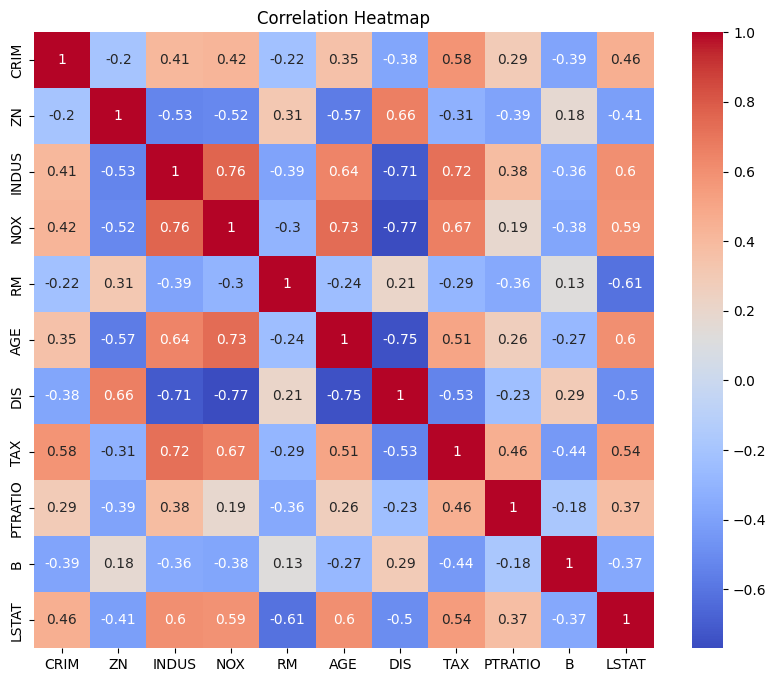

In [4]:
# DATA PROFILING
import seaborn as sns
import matplotlib.pyplot as plt

# Correlation heatmap
correlation_matrix = df_x.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(data = correlation_matrix, cmap='coolwarm', annot = True)
plt.title('Correlation Heatmap')
plt.show()

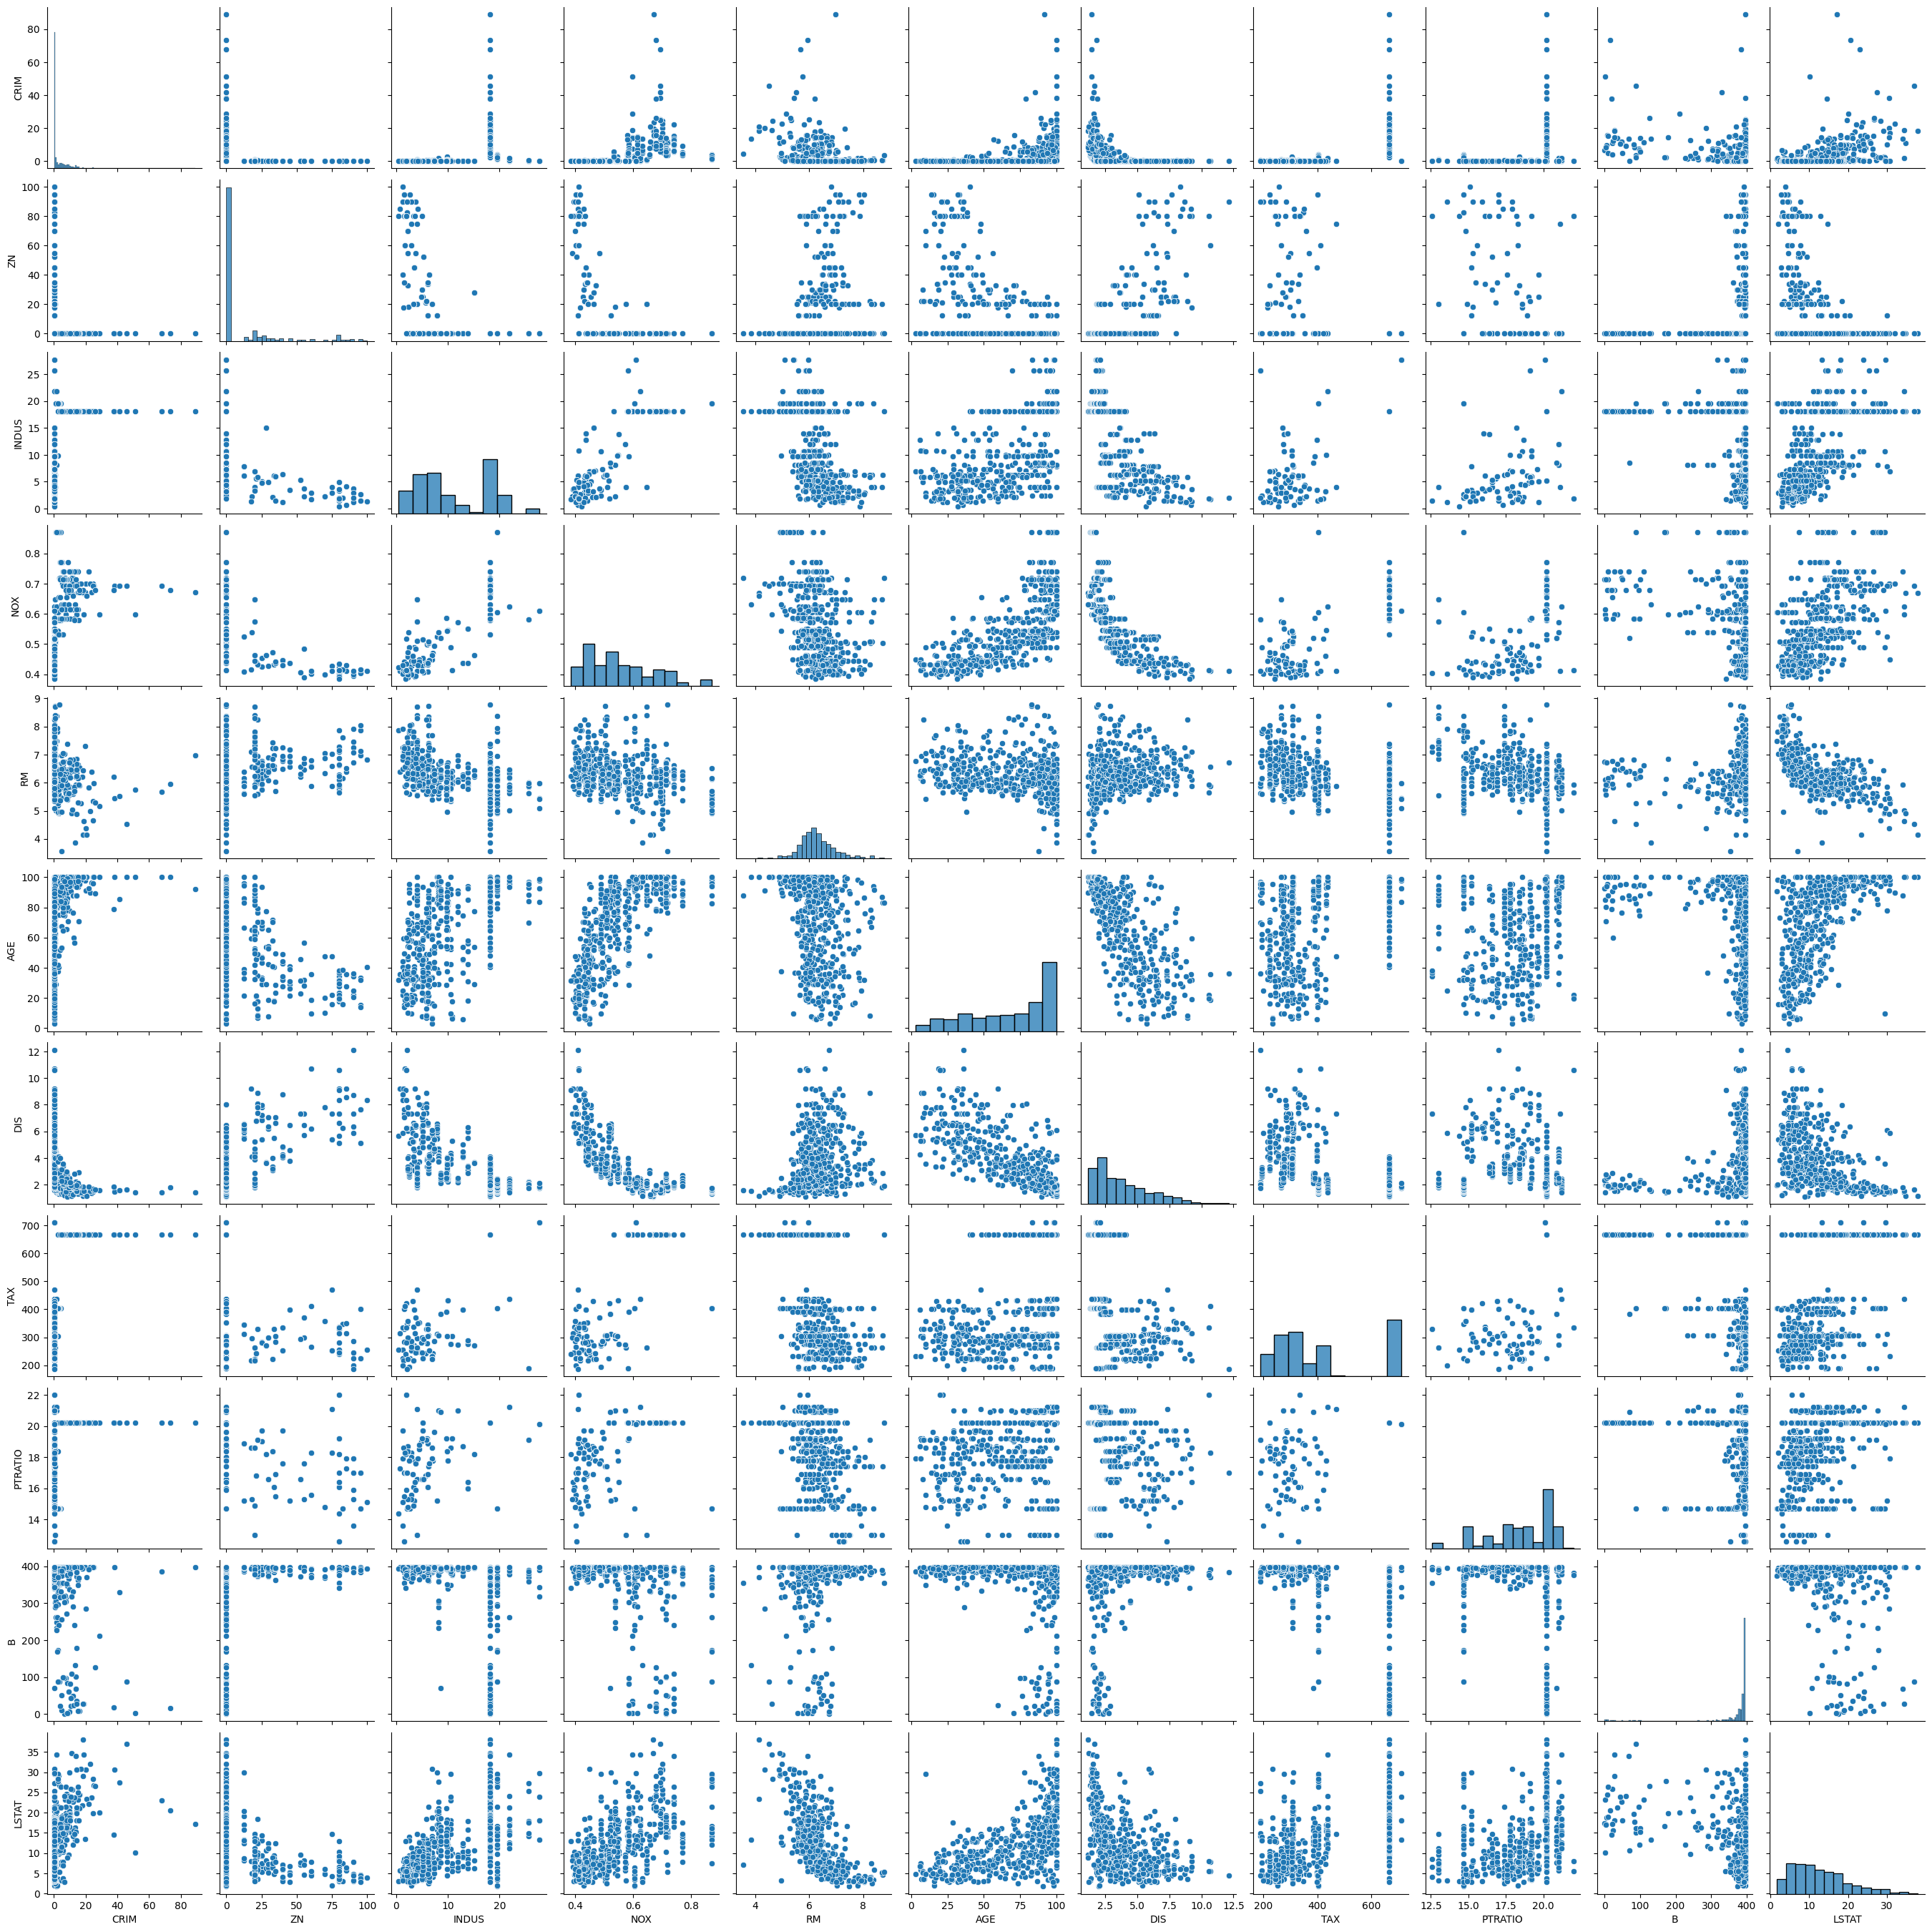

In [5]:
# PAIRPLOT
sns.pairplot(df_x)
plt.show()

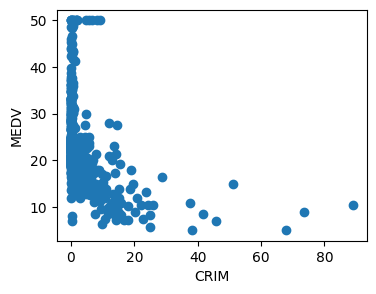

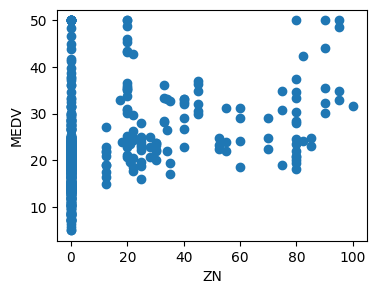

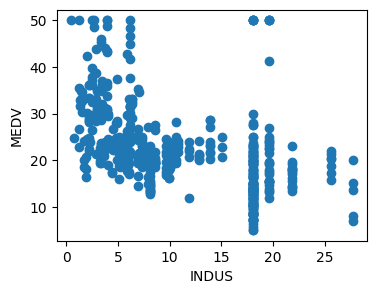

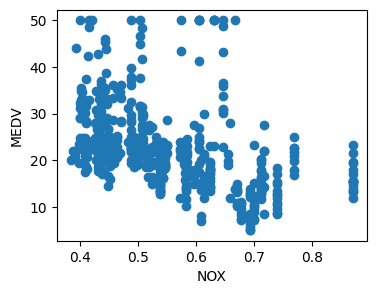

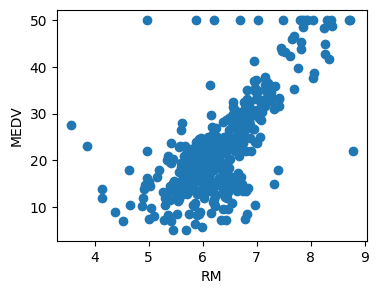

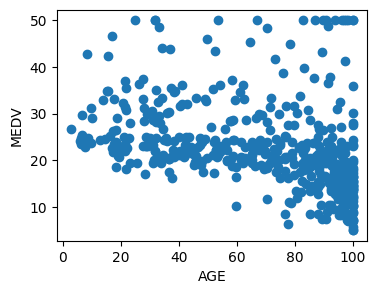

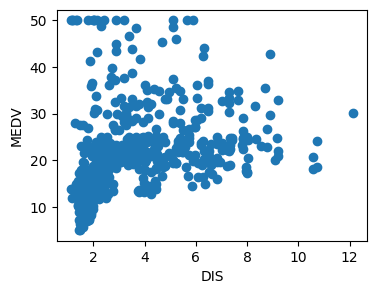

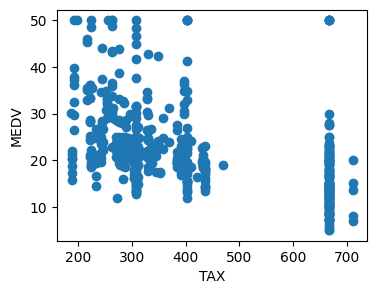

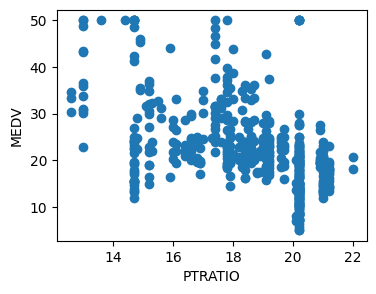

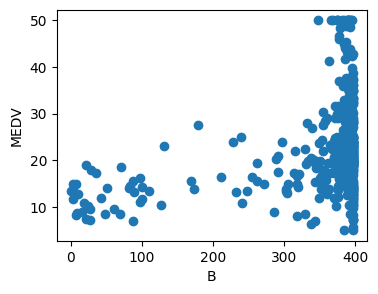

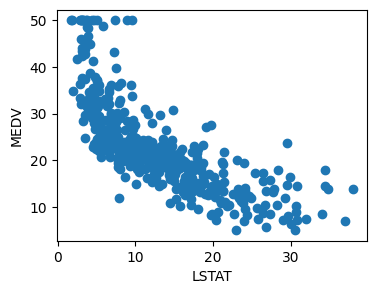

In [6]:
# FEATURE VS TARGET SCATTERPLOT
for feature in df_x.columns:
  plt.figure(figsize = (4, 3))
  plt.scatter(x = df_x[feature], y = df_y)
  plt.xlabel(feature)
  plt.ylabel('MEDV')
  plt.show()

In [7]:
df_y.describe()

count    506.000000
mean      22.532806
std        9.197104
min        5.000000
25%       17.025000
50%       21.200000
75%       25.000000
max       50.000000
Name: MEDV, dtype: float64

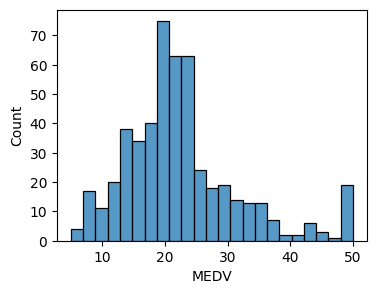

In [8]:
# DISTRIBUTION OF MEDV
plt.figure(figsize = (4, 3))
sns.histplot(df_y)
plt.xlabel('MEDV')
plt.show()

___

### **Scaling and Splitting the data**
1. Scale the features so that all are in the same range (e.g., using Min-Max scaling).
2. Split the dataset into training and testing sets, with 80% training and 20% testing.

**MinMaxScaler**: Used when features should be scaled to a bounded range especially for neural networks and models requiring <mark>distance metrics</mark>.

In [9]:
# FEATURE-SCALING (Min-Max)
from sklearn.preprocessing import MinMaxScaler
minMaxScaler = MinMaxScaler()
df_x = minMaxScaler.fit_transform(df_x)

In [10]:
# Train Test Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_x, df_y, test_size=0.2, random_state=42)

# Convert y_train and y_test to numpy arrays
y_train = y_train.to_numpy()
y_test = y_test.to_numpy()

In [11]:
print("X_train:\n",X_train,"\nY_train:\n", y_train)

X_train:
 [[1.68788358e-01 0.00000000e+00 6.46627566e-01 ... 8.08510638e-01
  8.80427656e-01 6.39624724e-01]
 [6.98067706e-03 0.00000000e+00 2.81524927e-01 ... 8.93617021e-01
  9.96772404e-01 1.85982340e-01]
 [3.18534767e-04 3.50000000e-01 2.05278592e-01 ... 4.57446809e-01
  9.12627969e-01 1.68322296e-01]
 ...
 [9.76735048e-05 8.00000000e-01 5.68181818e-02 ... 4.68085106e-01
  9.84971506e-01 1.17549669e-01]
 [1.25369170e-01 0.00000000e+00 6.46627566e-01 ... 8.08510638e-01
  2.76186394e-01 5.94370861e-01]
 [2.50017197e-03 0.00000000e+00 2.96920821e-01 ... 8.82978723e-01
  1.77719502e-01 2.45584989e-01]] 
Y_train:
 [12.  19.9 19.4 13.4 18.2 24.6 21.1 24.7  8.7 27.5 20.7 36.2 31.6 11.7
 39.8 13.9 21.8 23.7 17.6 24.4  8.8 19.2 25.3 20.4 23.1 37.9 15.6 45.4
 15.7 22.6 14.5 18.7 17.8 16.1 20.6 31.6 29.1 15.6 17.5 22.5 19.4 19.3
  8.5 20.6 17.  17.1 14.5 50.  14.3 12.6 28.7 21.2 19.3 23.1 19.1 25.
 33.4  5.  29.6 18.7 21.7 23.1 22.8 21.  48.8 14.6 16.6 27.1 20.1 19.8
 21.  41.3 23.2 20.4 18.5

___

### **Implement KNN Regressor from Scratch**

1. Implement a KNN regressor from scratch- Simple Average
  
2. Support the following distance metrics:

   - Euclidean distance
   - Manhattan distance
   - Cosine distance

3. For different values of k (e.g., 3, 5, 7, 9, 11), predict test set targets and compute R² scores for each combination of k and distance metric.
4. Create a table summarizing the R² scores for each (k, distance metric)

In [15]:
import numpy as np

def euclidean_distance(x1, x2):
    return (np.sum(np.abs(x1 - x2) ** 2))**(1/2)

def manhattan_distance(x1, x2):
    return np.sum(np.abs(x1 - x2))

def cosine_similarity(x1, x2):
    return np.dot(x1, x2) / (np.linalg.norm(x1) * np.linalg.norm(x2))

class KNN:
    def __init__(self, k=3, distance_metric: str='euclidean'):
        self.k = k
        self.distance_metric = distance_metric

    def fit_knn(self, X_train, y_train):
        self.X_train = X_train
        self.y_train = y_train

    def _compute_distance(self, x):
        if self.distance_metric == 'euclidean':
            distances = [euclidean_distance(x, x_train) for x_train in self.X_train]
        elif self.distance_metric == 'manhattan':
            distances = [manhattan_distance(x, x_train) for x_train in self.X_train]
        elif self.distance_metric == 'cosine':
            distances = [cosine_similarity(x, x_train) for x_train in self.X_train]
        else:
            raise ValueError("Unsupported distance metric")
        return distances

    def predict(self, X_test):
        predictions = []
        for x in X_test:
            distances = self._compute_distance(x)
            if self.distance_metric == 'cosine':
                k_indices = np.argsort(distances)[-self.k:]  # highest similarities
                k_nearest_labels = np.array([self.y_train[i] for i in k_indices])
                prediction = np.mean(k_nearest_labels) # Mean in Regression other than the template where we used Counter to get the most common element
            else:
                k_indices = np.argsort(distances)[:self.k]  # lowest distances
                k_nearest_labels = np.array([self.y_train[i] for i in k_indices])
                prediction = np.mean(k_nearest_labels)
            predictions.append(prediction)
        return predictions

In [16]:
from sklearn.metrics import r2_score
import pandas as pd

k = [ (2*n + 1) for n in range(1,11) ]
distance_metrics = ['euclidean','manhattan','cosine']
predictions = []
for value in k:
  for distance_metric in distance_metrics:
    knn = KNN(k=value, distance_metric=distance_metric)
    knn.fit_knn(X_train, y_train)
    if (distance_metric == 'manhattan') and (value == 3): # separating k=3,manhattan from others bcz the most accurate is needed for the plot below in task 7
        y_test_pred_simple = knn.predict(X_test)
        weighted_r2_score = r2_score(y_test, y_test_pred_simple)
        predictions.append({'k' : int(value), 'distance_metric' : str(distance_metric), 'R2_scores' : float(weighted_r2_score)})
    else :
        y_test_pred = knn.predict(X_test)
        weighted_r2_score = r2_score(y_test, y_test_pred)
        predictions.append({'k' : int(value), 'distance_metric' : str(distance_metric), 'R2_scores' : float(weighted_r2_score)})

predictions_df = pd.DataFrame(predictions)
predictions_df  = predictions_df.pivot(index='k', columns='distance_metric', values='R2_scores')
predictions_df

distance_metric,cosine,euclidean,manhattan
k,,,
3,0.824191,0.806226,0.847485
5,0.818731,0.820246,0.817800
7,0.805661,0.811738,0.824586
9,0.760705,0.767605,0.802605
11,0.733540,0.735035,0.782407
13,0.703742,0.720314,0.755244
15,0.675849,0.689504,0.727092
17,0.670835,0.671341,0.711597
19,0.663203,0.675942,0.695664


In [17]:
predictions_df.describe()

distance_metric,cosine,euclidean,manhattan
count,10.000000,10.000000,10.000000
mean,0.729903,0.734855,0.765412
std,0.068842,0.063457,0.057474
min,0.642570,0.650597,0.689637
25%,0.672089,0.679332,0.715471
50%,0.718641,0.727674,0.768826
75%,0.794422,0.796571,0.814002
max,0.824191,0.820246,0.847485


___

### **Compare with Scikit-learn's Simple KNN**
1. Identify the (k, distance metric) combination that gave the best R² score from your custom implementation.
2. Use scikit-learn’s KNeighborsRegressor with algorithm='brute', weights='uniform', and the same (k, distance metric) to train and test on the dataset.
3. Compare the R² score of the scikit-learn model with your custom implementation for that best configuration

In [18]:
# best R2 score at k = 3, metric = 'manhattan'
from sklearn.neighbors import KNeighborsRegressor
k = [ (2*n + 1) for n in range(1,11) ]
distance_metrics = ['euclidean','manhattan','cosine']
predictions = []
for value in k:
  for distance_metric in distance_metrics:
    knn_weight = KNeighborsRegressor(algorithm = 'brute', weights = 'uniform', n_neighbors = value, metric = distance_metric)
    knn_weight.fit(X_train, y_train)
    y_test_pred = knn_weight.predict(X_test)
    score = r2_score(y_test, y_test_pred)
    predictions.append({'k' : int(value), 'distance_metric' : str(distance_metric), 'R2_scores' : float(score)})

sk_predictions_df = pd.DataFrame(predictions)
sk_predictions_df  = sk_predictions_df.pivot(index='k', columns='distance_metric', values='R2_scores')
sk_predictions_df

distance_metric,cosine,euclidean,manhattan
k,,,
3,0.824191,0.806226,0.847485
5,0.818731,0.820246,0.817800
7,0.805661,0.811738,0.824586
9,0.760705,0.767605,0.802605
11,0.733540,0.735035,0.782407
13,0.703742,0.720314,0.755244
15,0.675849,0.689504,0.727092
17,0.670835,0.671341,0.711597
19,0.663203,0.675942,0.695664


> custom implementation and sklearn gives approximately similar results.

___

### **Implement Weighted KNN Regressor from Scratch**
1. Implement a weighted average KNN regressor from scratch, where weights are the inverse of the distance to neighbors.
  
2. Support the following distance metrics:

   - Euclidean distance
   - Manhattan distance
   - Cosine distance
4. For different values of k (e.g., 3, 5, 7, 9, 11), predict test set targets and compute R² scores for each combination of k and distance metric.
5. Create a table summarizing the R² scores for each (k, distance metric) pair.

In [19]:
import numpy as np

def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2) ** 2))

def manhattan_distance(x1, x2):
    return np.sum(np.abs(x1 - x2))

def cosine_similarity(x1, x2):
    return np.dot(x1, x2) / (np.linalg.norm(x1) * np.linalg.norm(x2))

class weighted_KNN:
    def __init__(self, k=3, distance_metric='euclidean'):
        self.k = k
        self.distance_metric = distance_metric

    def fit_knn(self, X_train, y_train):
        self.X_train = np.array(X_train)
        self.y_train = np.array(y_train)

    def _compute_distance(self, x):
        if self.distance_metric == 'euclidean':
            return np.array([euclidean_distance(x, x_train) for x_train in self.X_train])
        elif self.distance_metric == 'manhattan':
            return np.array([manhattan_distance(x, x_train) for x_train in self.X_train])
        elif self.distance_metric == 'cosine':
            return np.array([1 - cosine_similarity(x, x_train) for x_train in self.X_train])
        else:
            raise ValueError("Unsupported distance metric")

    def predict(self, X_test):
        X_test = np.array(X_test)
        predictions = []

        for x in X_test:      
            distances = self._compute_distance(x)
            k_indices = np.argsort(distances)[:self.k]
            k_distances = distances[k_indices]
            k_targets = self.y_train[k_indices]

            eps = 1e-6
            weights = 1 / (k_distances + eps)
    
            weighted_sum = np.dot(weights, k_targets)
            total_weight = np.sum(weights)
    
            if total_weight != 0:
                prediction = weighted_sum / total_weight
            else :
                prediction = np.mean(k_targets)

            predictions.append(prediction)

        return np.array(predictions)

In [20]:
k = [ (2*n + 1) for n in range(1,11) ]
distance_metrics = ['euclidean','manhattan','cosine']
predictions = []
for value in k:
  for distance_metric in distance_metrics:
    weighted_knn = weighted_KNN(k=value, distance_metric=distance_metric)
    weighted_knn.fit_knn(X_train, y_train)
    if (distance_metric == 'cosine') and (value == 7): # separating cosine,k=7 from others bcz the most accurate is needed for the plot below in task 7
        y_test_pred_wtd = weighted_knn.predict(X_test)
        weighted_r2_score = r2_score(y_test, y_test_pred_wtd)
        predictions.append({'k' : int(value), 'distance_metric' : str(distance_metric), 'R2_scores' : float(weighted_r2_score)})
    else :
        y_test_pred = weighted_knn.predict(X_test)
        weighted_r2_score = r2_score(y_test, y_test_pred)
        predictions.append({'k' : int(value), 'distance_metric' : str(distance_metric), 'R2_scores' : float(weighted_r2_score)})

weighted_predictions_df = pd.DataFrame(predictions)
weighted_predictions_df  = weighted_predictions_df.pivot(index='k', columns='distance_metric', values='R2_scores')
weighted_predictions_df

distance_metric,cosine,euclidean,manhattan
k,,,
3,0.848383,0.824443,0.856657
5,0.858561,0.844146,0.839148
7,0.858671,0.836881,0.848422
9,0.836191,0.806976,0.831864
11,0.822313,0.782309,0.816441
13,0.806365,0.769492,0.794383
15,0.792059,0.744996,0.771914
17,0.785298,0.727373,0.758441
19,0.776500,0.726156,0.745048


In [21]:
predictions_df.describe()

distance_metric,cosine,euclidean,manhattan
count,10.000000,10.000000,10.000000
mean,0.729903,0.734855,0.765412
std,0.068842,0.063457,0.057474
min,0.642570,0.650597,0.689637
25%,0.672089,0.679332,0.715471
50%,0.718641,0.727674,0.768826
75%,0.794422,0.796571,0.814002
max,0.824191,0.820246,0.847485


___

### **Compare with scikit-learn Weighted KNN**
1. Identify the best (k, distance metric) combination from your weighted KNN results.

2. Use scikit-learn’s KNeighborsRegressor with algorithm='brute' and weights='distance' for the same (k, distance metric).

> Best one comes out to be cosine with k = 7

In [22]:
# best R2 score at k = 7, metric = 'cosine'
from sklearn.neighbors import KNeighborsRegressor
k = [ (2*n + 1) for n in range(1,11) ]
distance_metrics = ['euclidean','manhattan','cosine']
predictions = []
for value in k:
  for distance_metric in distance_metrics:
    knn_weight = KNeighborsRegressor(algorithm = 'brute', weights = 'distance', n_neighbors = value, metric = distance_metric)
    knn_weight.fit(X_train, y_train)
    y_test_pred = knn_weight.predict(X_test)
    score = r2_score(y_test, y_test_pred)
    predictions.append({'k' : int(value), 'distance_metric' : str(distance_metric), 'R2_scores' : float(score)})

sk_weighted_predictions_df = pd.DataFrame(predictions)
sk_weighted_predictions_df  = sk_weighted_predictions_df.pivot(index='k', columns='distance_metric', values='R2_scores')
sk_weighted_predictions_df

distance_metric,cosine,euclidean,manhattan
k,,,
3,0.848384,0.824443,0.856657
5,0.858564,0.844146,0.839148
7,0.858675,0.836881,0.848422
9,0.836199,0.806976,0.831864
11,0.822323,0.782309,0.816441
13,0.806378,0.769492,0.794383
15,0.792073,0.744997,0.771915
17,0.785312,0.727373,0.758441
19,0.776515,0.726157,0.745048


> Both the results are approximately similar

____

### **Reporting and Visualization**
1. Plot the R² scores for both simple and weighted KNN from your implementation across different k and distance metrics (heatmap or line plots).

2. Plot corresponding R² scores from scikit-learn for the same parameters.

3. Compare the R² scores of scikit-learn weighted KNN with your custom weighted KNN for the best combination.

4. Plotting the Scatter Plots of the actual and predicted datapoints

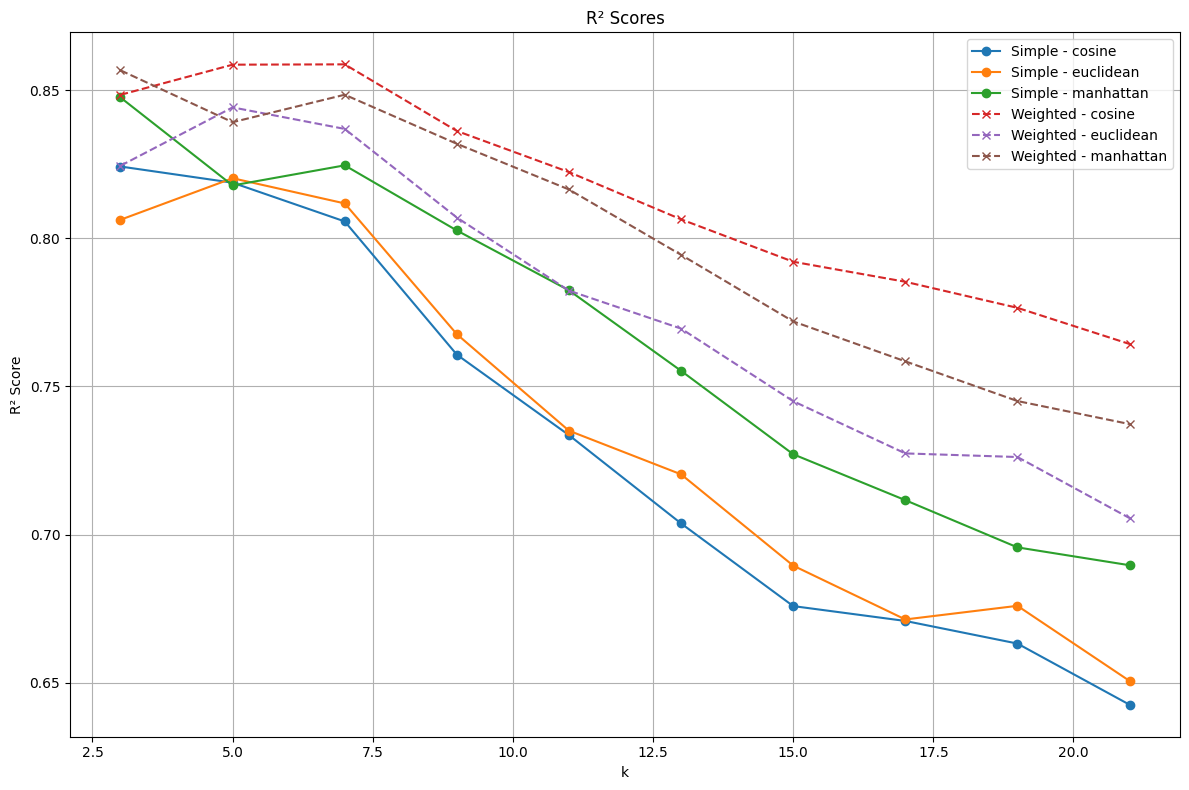

In [23]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))

for metric in predictions_df.columns:
    plt.plot(predictions_df.index, predictions_df[metric], marker='o', label=f'Simple - {metric}')
for metric in weighted_predictions_df.columns:
    plt.plot(weighted_predictions_df.index, weighted_predictions_df[metric], marker='x', linestyle='--', label=f'Weighted - {metric}')

plt.title("R² Scores")
plt.xlabel("k")
plt.ylabel("R² Score")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

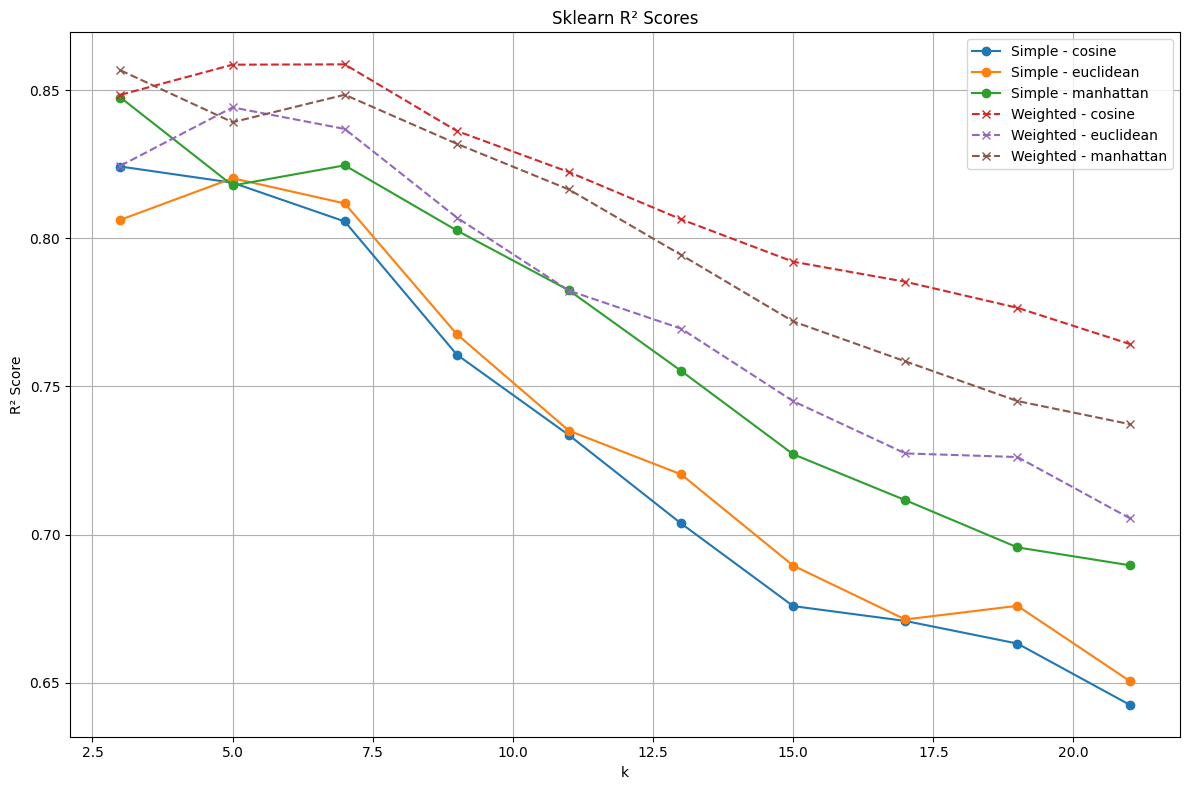

In [24]:
plt.figure(figsize=(12, 8))

for metric in predictions_df.columns:
    plt.plot(sk_predictions_df.index, sk_predictions_df[metric], marker='o', label=f'Simple - {metric}')
for metric in weighted_predictions_df.columns:
    plt.plot(sk_weighted_predictions_df.index, sk_weighted_predictions_df[metric], marker='x', linestyle='--', label=f'Weighted - {metric}')

plt.title("Sklearn R² Scores")
plt.xlabel("k")
plt.ylabel("R² Score")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

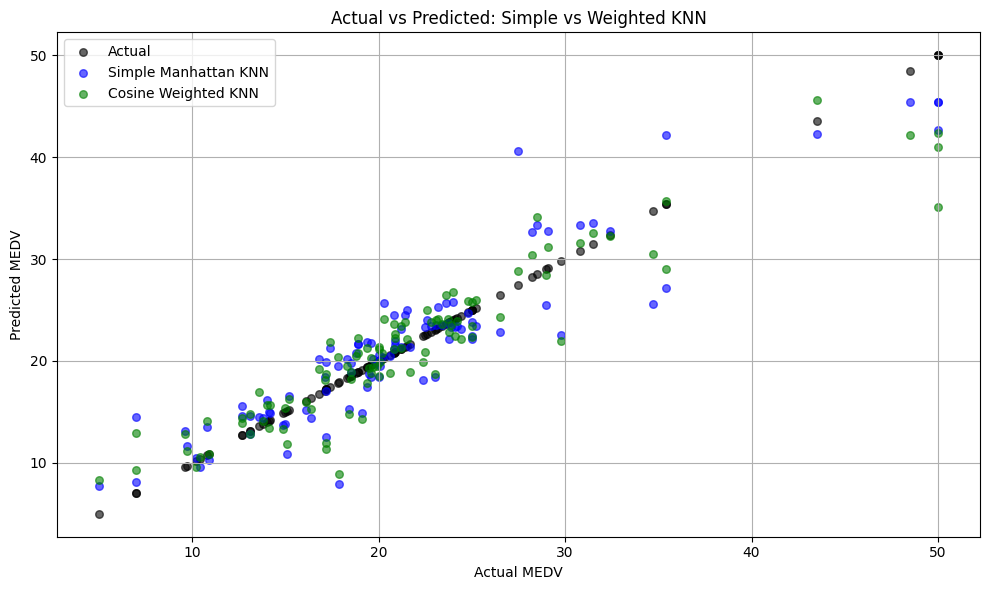

In [ ]:
plt.figure(figsize=(10, 6))

plt.scatter(y_test, y_test, label='Actual', color='black', alpha=0.6, s=30)

plt.scatter(y_test, y_test_pred_simple, label='Simple Manhattan KNN', color='blue', alpha=0.6, s=30)

plt.scatter(y_test, y_test_pred_wtd, label='Cosine Weighted KNN', color='green', alpha=0.6, s=30)

plt.xlabel("Actual MEDV")
plt.ylabel("Predicted MEDV")
plt.title("Actual vs Predicted: Simple vs Weighted KNN")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


____

### **Summary of Findings**

- Which (k, distance metric) performed best?
    -  k=7, cosine, weighted performed the best

- How does your implementation compare with scikit-learn?
    - implementation of knn from scratch is approximately similar for both weighted and uniform knn

- Discuss any observations regarding distance metrics or weighting.
    - using weights give more accurate results, it was done by using the inverse of distance, while doing this there might have been a case where cosine similarity would get infinte to avoid that added epsilon "eps" = 10^-6 though i think i can get more smaller.

___